In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.gofplots import qqplot

In [2]:
df= pd.read_csv('/content/bike_sharing.csv')

In [3]:
df.head(10)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
5,2011-01-01 05:00:00,1,0,0,2,9.84,12.880,75,6.0032,0,1,1
6,2011-01-01 06:00:00,1,0,0,1,9.02,13.635,80,0.0000,2,0,2
7,2011-01-01 07:00:00,1,0,0,1,8.20,12.880,86,0.0000,1,2,3
8,2011-01-01 08:00:00,1,0,0,1,9.84,14.395,75,0.0000,1,7,8
9,2011-01-01 09:00:00,1,0,0,1,13.12,17.425,76,0.0000,8,6,14


In [4]:
df.shape
print('No. Of Rows: ',df.shape[0])
print('No. Of Columns : ',df.shape[1])

No. Of Rows:  10886
No. Of Columns :  12


In [5]:
df.dtypes

datetime       object
season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity        int64
windspeed     float64
casual          int64
registered      int64
count           int64
dtype: object

In [6]:
df.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [7]:
 df.describe(include='all')

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
unique,10886,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,NaN,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,NaN,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,NaN,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,NaN,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,NaN,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000


In [12]:
# converting datetime column into datetime datatype
df['datetime'] = pd.to_datetime(df['datetime'])

# converting required columns into categorical data type
df[['season','holiday','workingday','weather']] = df[['season','holiday','workingday','weather']].astype('category')

# Univariate Analysis

In [13]:
# changing the values for clear understanding of attributes
def seasons(x):
    if x['season'] == 1:
        x['season'] = 'spring'
    elif x['season'] == 2:
        x['season'] = 'summer'
    elif x['season'] == 3:
        x['season'] = 'fall'
    elif x['season'] == 4:
        x['season'] = 'winter'
    return x

def holiday(x):
    if x['holiday'] == 0:
        x['holiday'] = 'Not holiday'
    elif x['holiday'] == 1:
        x['holiday'] = 'Holiday'
    return x

def weathers(x):
    if x['weather'] == 1:
        x['weather'] = "Partly Cloudy"
    elif x['weather'] == 2:
        x['weather'] = "Misty"
    elif x['weather'] == 3:
        x['weather'] = "Mixed Precipitation"
    else:
        x['weather'] = "Severe Weather"
    return x

def workday(x):
    if x['workingday'] == 1:
        x['workingday'] = 'Workingday'
    elif x['workingday'] == 0:
        x['workingday'] = 'Non-Workingday'
    return x

df = df.apply(seasons,axis=1)
df = df.apply(holiday,axis=1)
df = df.apply(weathers,axis=1)
df = df.apply(workday,axis=1)

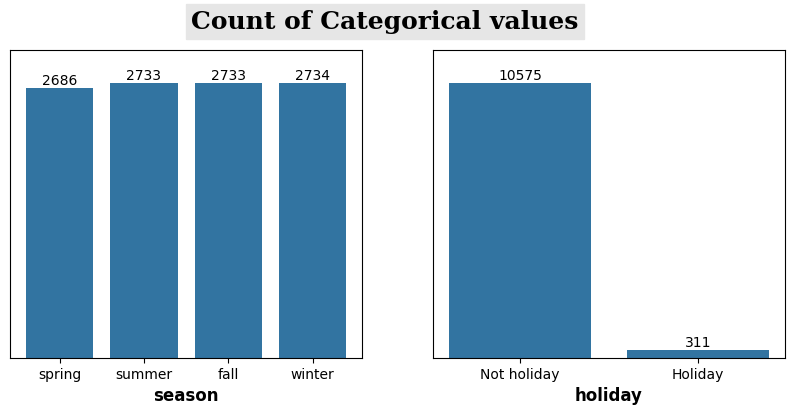

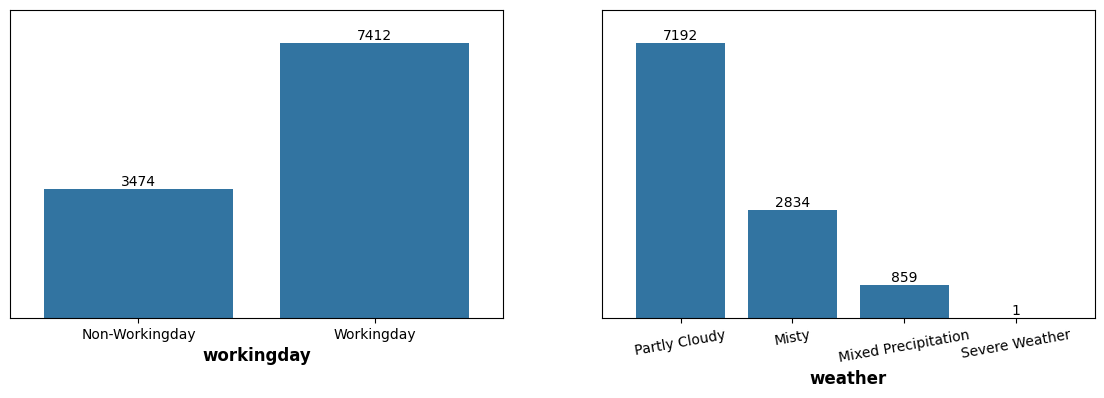

In [14]:
# Univariate Graph of Categorical values showing Counts
fig, ax = plt.subplots(nrows=1, ncols=2,figsize=(10,4))
fig.suptitle("Count of Categorical values",fontsize=18,weight='heavy',backgroundcolor='0.9',family='serif')
lst1 = ['season','holiday']
for i,cols in zip(range(2),lst1):
    sns.countplot(data=df,x=cols,ax=ax[i])
    ax[i].set_ylabel("")
    ax[i].set_xlabel(cols,weight='bold',fontsize=12)
    ax[i].set_yticks([])
    ax[i].margins(x = 0.05,y = 0.12)
    for bar in ax[i].containers:
        ax[i].bar_label(bar,weight='light',fontsize=10)

fig, ax = plt.subplots(nrows=1, ncols=2,figsize=(14,4))
lst2 = ['workingday','weather']
for i,cols in zip(range(2),lst2):
    sns.countplot(data=df,x=cols,ax=ax[i])
    ax[i].set_ylabel("")
    ax[i].set_xlabel(cols,weight='bold',fontsize=12)
    ax[i].set_yticks([])
    plt.xticks(rotation=10)
    ax[i].margins(x = 0.08,y = 0.12)
    for bar in ax[i].containers:
        ax[i].bar_label(bar,weight='light',fontsize=10)

In [15]:
# droping Severe Weather from weather attribute
df = df.drop(df[df['weather']=='Severe Weather'].index)

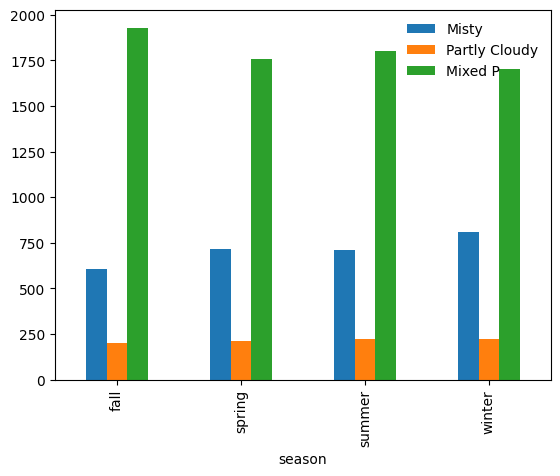

In [16]:
pd.crosstab(df['season'],df['weather']).plot(kind='bar')
plt.legend(["Misty","Partly Cloudy","Mixed P"],frameon=False)
plt.show()

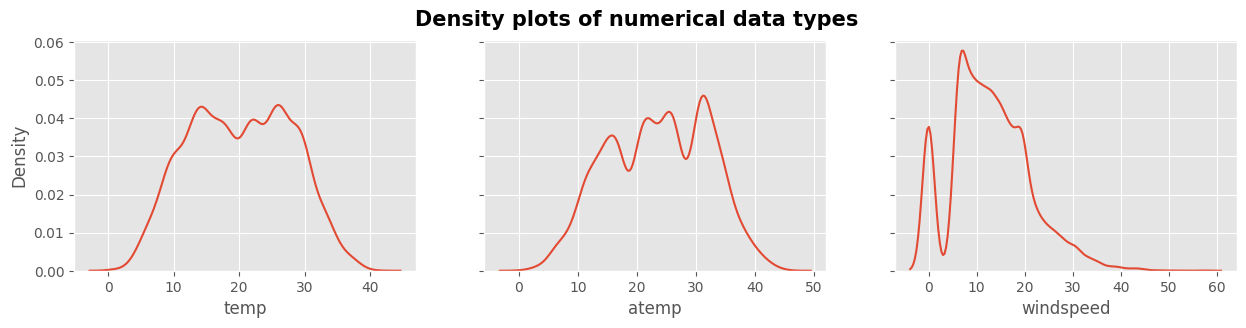

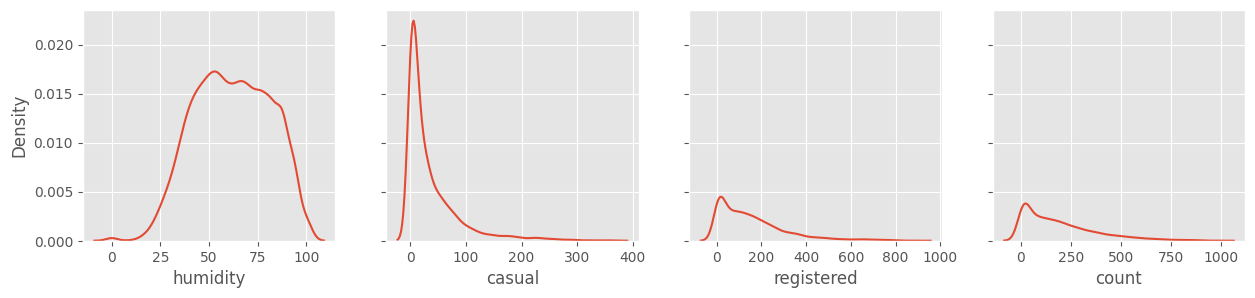

In [17]:
# Density plots of numerical values
with plt.style.context('ggplot'):

    flt = df.select_dtypes(include=['float64']).columns
    shape = len(flt)
    fig,ax = plt.subplots(nrows=1,ncols=shape,figsize=(15,3),sharey=True)
    fig.suptitle("Density plots of numerical data types",fontsize=15,weight='heavy')
    for i,cols in zip(range(shape),flt):
        sns.kdeplot(data=df,x=cols,ax = ax[i])

    flt = df.select_dtypes(include=['int64']).columns
    shape = len(flt)
    fig,ax = plt.subplots(nrows=1,ncols=shape,figsize=(15,3),sharey=True)
    for i,cols in zip(range(shape),flt):
        sns.kdeplot(data=df,x=cols,ax = ax[i])

# Detecting Outliers

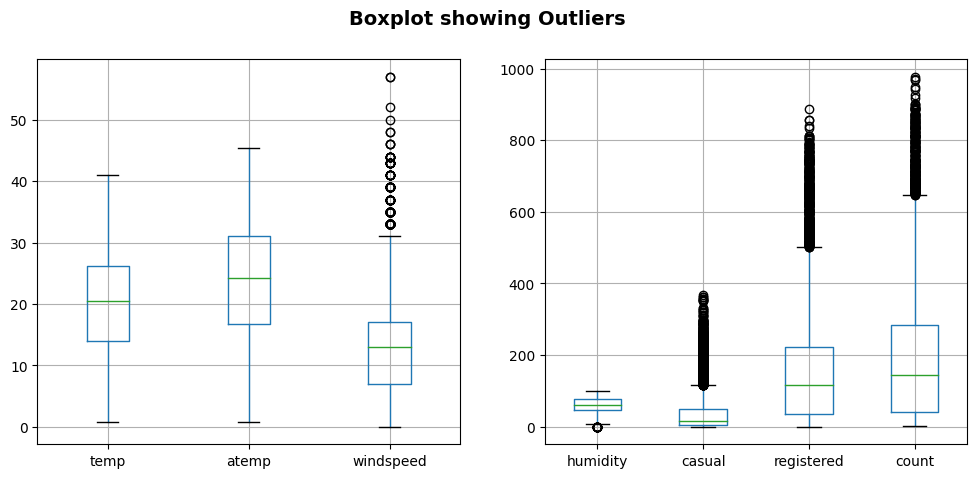

In [18]:
# outliers
ints = df.select_dtypes(include=['int64'])
floats = df.select_dtypes(include=['float64'])

fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(12,5))
floats = df.select_dtypes(include=['float64'])
floats.boxplot(column=floats.columns.to_list(),ax=ax[0])
ints.boxplot(column=ints.columns.to_list(),ax=ax[1])
fig.suptitle("Boxplot showing Outliers",fontsize=14,weight='heavy')
plt.show()

In [21]:
dk=df.copy()

In [19]:
def remove_outlier(df, x):
    Q1 = df[x].quantile(0.25)
    Q3 = df[x].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5*IQR
    upper = Q3 + 1.5*IQR
    # print((lower-df[x].mean())/df[x].std())
    # print((upper-df[x].mean())/df[x].std())
    # print(df.shape, x, lower, upper)
    return df[(df[x] > lower) & (df[x] < upper)]

In [22]:
for i in dk[['humidity', 'windspeed', 'count']].columns:

    # print(i)
    dk = remove_outlier(dk, i)
    print(dk.shape)

(10863, 12)
(10637, 12)
(10351, 12)


In [23]:
import scipy.stats as stats

In [24]:
stats.chi2_contingency(pd.crosstab(dk['season'],dk['weather']))

Chi2ContingencyResult(statistic=47.34127472280649, pvalue=1.5996188650675265e-08, dof=6, expected_freq=array([[ 685.95633272,  200.03922326, 1712.00444402],
       [ 667.73809294,  194.72640325, 1666.53550382],
       [ 680.93971597,  198.57627282, 1699.48401121],
       [ 698.36585837,  203.65810067, 1742.97604096]]))

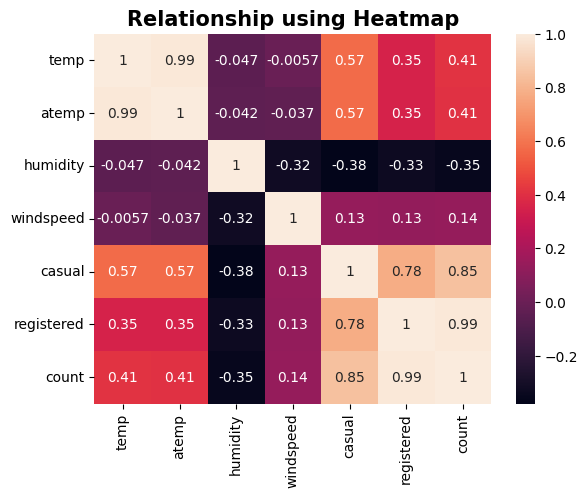

In [25]:
sns.heatmap(df.corr(method='spearman',numeric_only=True),annot =True)
plt.title("Relationship using Heatmap",fontsize=15,weight='heavy')
plt.show()

# Bivariate Analysis

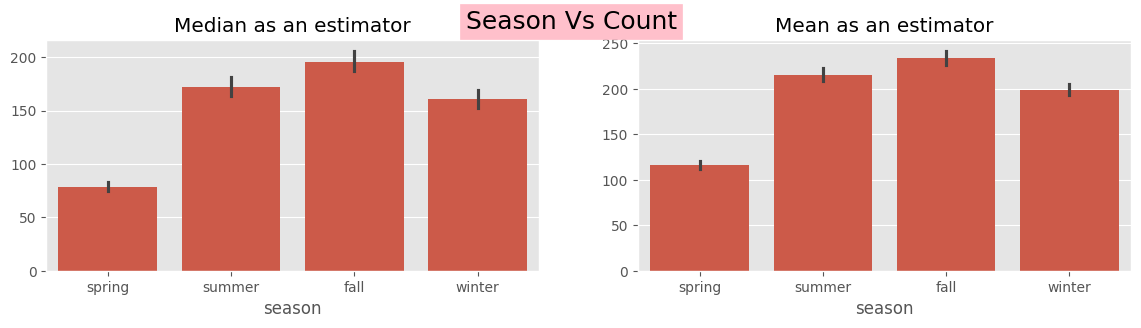

In [28]:
# barplot showing relation between season and count attributes
with plt.style.context('ggplot'):

    fig,ax=plt.subplots(nrows=1,ncols=2,figsize=(14,3))
    fig.suptitle("Season Vs Count",fontsize=18,backgroundcolor='pink')

    sns.barplot(data=df,x='season',y='count',estimator='median',ax=ax[0])   # When we take median of all these values
    ax[0].set_title('Median as an estimator')
    ax[0].set_ylabel("")

    sns.barplot(data=df,x='season',y='count',estimator='mean',ax=ax[1])     # On taking mean of the different values in season attributes
    ax[1].set_title('Mean as an estimator')
    ax[1].set_ylabel("")

    plt.show()

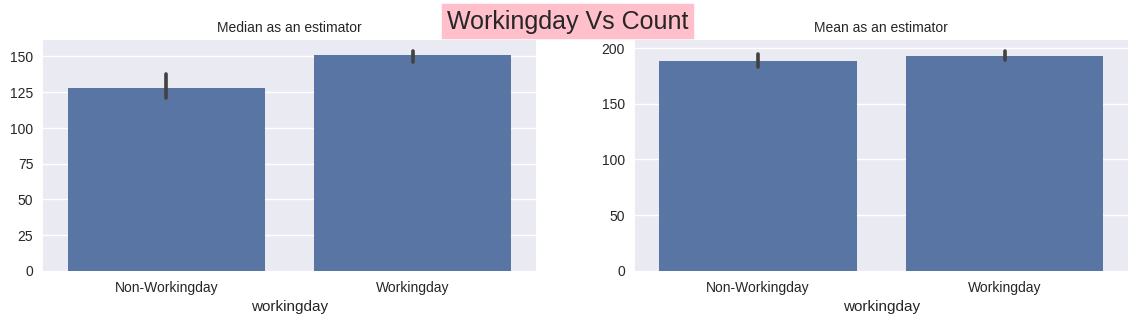

In [29]:
# barplot showing relation between Workingday and count attributes
with plt.style.context('seaborn'):

    fig,ax=plt.subplots(nrows=1,ncols=2,figsize=(14,3))
    fig.suptitle("Workingday Vs Count",fontsize=18,backgroundcolor='pink')

    sns.barplot(data=df,x='workingday',y='count',estimator='median',ax=ax[0])   # When we take median of all these values
    ax[0].set_title('Median as an estimator',fontsize=10)
    ax[0].set_ylabel("")

    sns.barplot(data=df,x='workingday',y='count',estimator='mean',ax=ax[1])     # On taking mean of the different values in season attributes
    ax[1].set_title('Mean as an estimator',fontsize=10)
    ax[1].set_ylabel("")

    plt.show()

<ipython-input-30-380712ff9884>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df,x='holiday',y='count',estimator='median',ax=ax[0],palette=['lightblue','lightgreen'])   # When we take median of all these values
<ipython-input-30-380712ff9884>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df,x='holiday',y='count',estimator='mean',ax=ax[1],palette=['lightblue','lightgreen'])     # On taking mean of the different values in season attributes


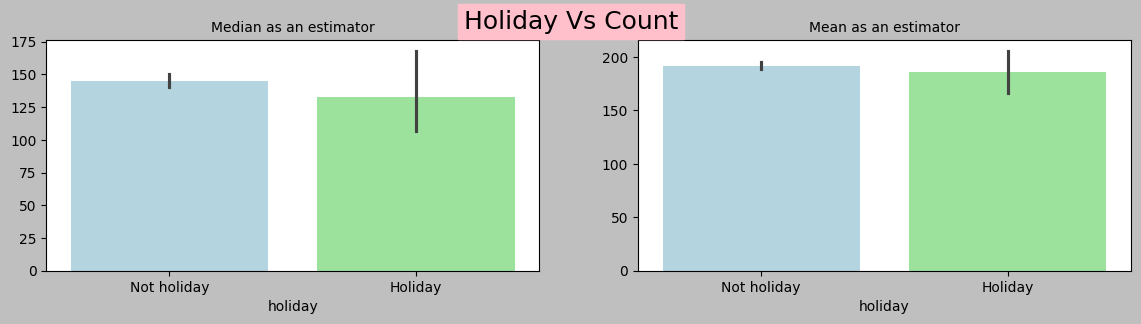

In [30]:
# barplot showing relation between Workingday and count attributes
with plt.style.context('grayscale'):

    fig,ax=plt.subplots(nrows=1,ncols=2,figsize=(14,3))
    fig.suptitle("Holiday Vs Count",fontsize=18,backgroundcolor='pink')

    sns.barplot(data=df,x='holiday',y='count',estimator='median',ax=ax[0],palette=['lightblue','lightgreen'])   # When we take median of all these values
    ax[0].set_title('Median as an estimator',fontsize=10)
    ax[0].set_ylabel("")

    sns.barplot(data=df,x='holiday',y='count',estimator='mean',ax=ax[1],palette=['lightblue','lightgreen'])     # On taking mean of the different values in season attributes
    ax[1].set_title('Mean as an estimator',fontsize=10)
    ax[1].set_ylabel("")

    plt.show()

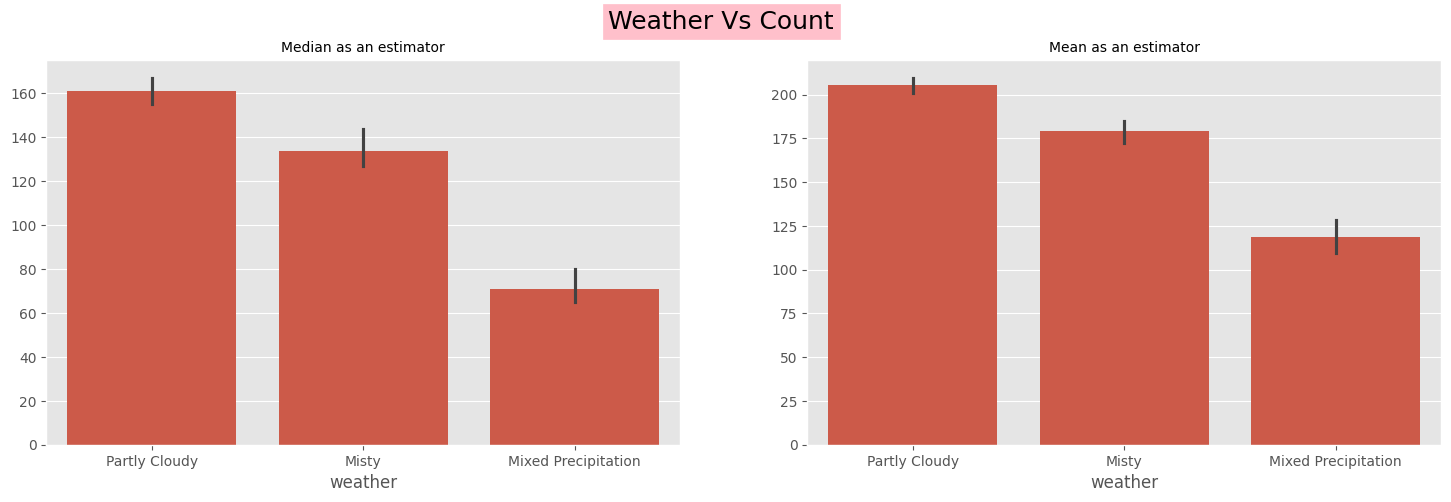

In [31]:
# barplot showing relation between Workingday and count attributes
with plt.style.context('ggplot'):

    fig,ax=plt.subplots(nrows=1,ncols=2,figsize=(18,5))
    fig.suptitle("Weather Vs Count",fontsize=18,backgroundcolor='pink')
    sns.barplot(data=df,x='weather',y='count',estimator='median',ax=ax[0])   # When we take median of all these values
    ax[0].set_title('Median as an estimator',fontsize=10)
    ax[0].set_ylabel("")

    sns.barplot(data=df,x='weather',y='count',estimator='mean',ax=ax[1])     # On taking mean of the different values in season attributes
    ax[1].set_title('Mean as an estimator',fontsize=10)
    ax[1].set_ylabel("")

    plt.show()

# Hypothesis Testing

In [32]:
# filtering non_working and working groups
non_working = df[df['workingday'] == 'Non-Workingday']['count']
working = df[df['workingday'] == 'Workingday']['count']

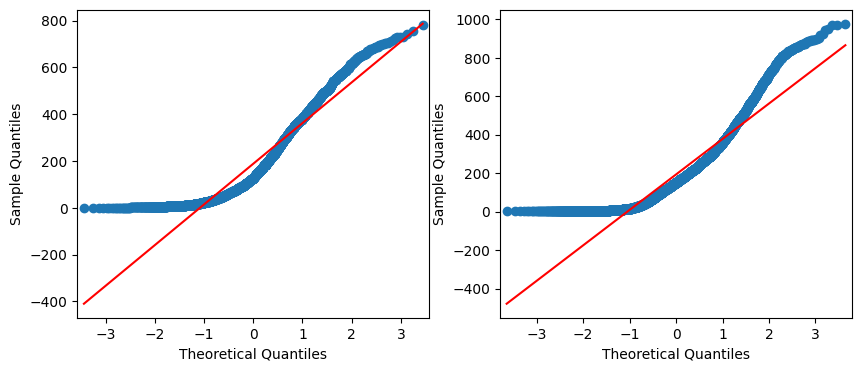

In [38]:
# Observation in each sample are normally distributed or the distribution is Gaussian
# We can check the above assumption using qqplot and shapiro test
fig,ax = plt.subplots(1,2,figsize=(10,4))
qqplot(non_working,line='s',ax=ax[0])
qqplot(working,line='s',ax=ax[1])

plt.show()

In [34]:
# Ho: Data is Gaussian
# Ha: Data is not Gaussian
samp = df.sample(50,random_state=2600)
stat, p_value1 = stats.shapiro(non_working)
stat, p_value2 = stats.shapiro(working)

if p_value1 <= 0.05:
    print(f"The p_value1 and p_value2 is {p_value1,p_value2}")
    print("Reject the null hypothesis")
    print("This means Data is Not Gaussian in nature")
else:
    print(f"The p_value1 and p_value2 is {p_value1,p_value2}")
    print("Failed to reject the null hypothesis")
    print("Data is Gaussian")

The p_value1 and p_value2 is (4.203895392974451e-45, 0.0)
Reject the null hypothesis
This means Data is Not Gaussian in nature


/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [35]:
# using levene test to check variance between the group
non_working = df[df['workingday'] == 'Non-Workingday']['count']
working = df[df['workingday'] == 'Workingday']['count']

_, p_value = stats.levene(non_working,working)
if p_value < 0.05:
    print(f"p-value is {p_value}")
    print("Variance is not equal")
else:
    print(f"p-value is {p_value}")
    print("Variance is equal in both the group")

p-value is 0.9489054295190451
Variance is equal in both the group


# t-test
######  Ho: The working day has no effect on number of electric cycles rented
###### Ha: The working day has effect on number of electric cycles rented

In [36]:
# working day has an effect on the number of electric cycles ( 2 sample T-test)
non_working = df[df['workingday'] == 'Non-Workingday']['count']
working = df[df['workingday'] == 'Workingday']['count']
statistic, p_value = stats.ttest_ind(non_working,working)
if p_value < 0.05:
    print(f"The p-value is {p_value}\nstatistic value: {statistic}")
    print("Reject the null hypothesis")
    print("The working day has effect on number of electric cycles rented")
else:
    print(f"The p-value is {p_value}\nstatistic value: {statistic}")
    print("Failed to reject the null hypothesis")
    print("The working day has no effect on number of electric cycles rented")

The p-value is 0.22607559007082925
statistic value: -1.2105985511265596
Failed to reject the null hypothesis
The working day has no effect on number of electric cycles rented


In [39]:
# filtering the group values
p_cloudy = df[df['weather']=="Partly Cloudy"]['count']
misty = df[df['weather']=="Misty"]['count']
mixed_p = df[df['weather']=="Mixed Precipitation"]['count']
s_weather = df[df['weather']=="Severe Weather"]['count']

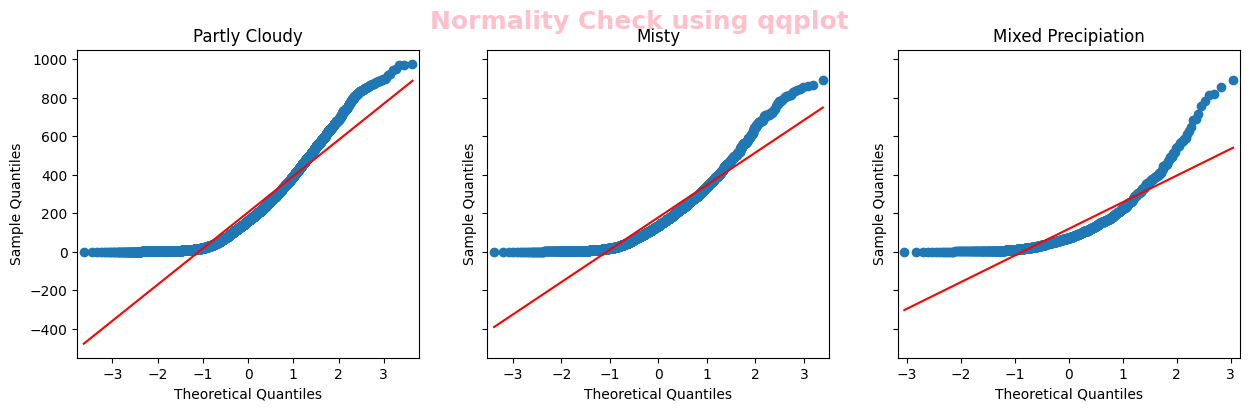

In [40]:
# qqplot
fig,ax = plt.subplots(1,3,figsize=(15,4), sharey=True)
fig.suptitle("Normality Check using qqplot",fontsize=18,weight='heavy',color='pink')
qqplot(p_cloudy,line='s',ax=ax[0])
ax[0].set_title('Partly Cloudy')
qqplot(misty,line='s',ax=ax[1])
ax[1].set_title('Misty')
qqplot(mixed_p,line='s',ax=ax[2])
ax[2].set_title('Mixed Precipiation')

plt.show()

In [41]:
# checking variance using levene test
# Ho: The variance are equal
# Ha: The variance are different

_, p_value = stats.levene(p_cloudy,misty,mixed_p)
if p_value < 0.05:
    print(f"The p_value is {p_value}")
    print("Reject the null hypothesis")
    print("The variance are different")
else:
    print(f"The p_value is {p_value}")
    print("Failed to reject the null hypothesis")
    print("The variance are same")

The p_value is 6.198278710731511e-36
Reject the null hypothesis
The variance are different


# Kruskal test

In [42]:
# kruskal test
stat, p = stats.kruskal(p_cloudy,misty,mixed_p)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
 print('The number of cycles rented are similar in different weather')
else:
 print('The number of cycles rented are different in different weather')

stat=204.956, p=0.000
The number of cycles rented are different in different weather


# ANOVA

In [43]:
# using Anova f_oneway to test the hypothesis
statistic,p_value = stats.f_oneway(p_cloudy,misty,mixed_p)
if p_value < 0.05:
    print(f"p_value : {p_value}\nstatistic value: {statistic}")
    print("Reject the null hypothesis")
    print("The number of cycles rented are different in different weather")
else:
    print(f"p_value : {p_value}\nstatistic value: {statistic}")
    print("Failed to Reject the null hypothesis")
    print("The number of cycles rented are similar in different weather")

p_value : 4.976448509904196e-43
statistic value: 98.28356881946706
Reject the null hypothesis
The number of cycles rented are different in different weather


# No. of cycles rented similar or different in different season

In [44]:
winter = df[df['season']=='winter']['count']
summer = df[df['season']=='summer']['count']
fall = df[df['season']=='fall']['count']
spring = df[df['season']=='spring']['count']

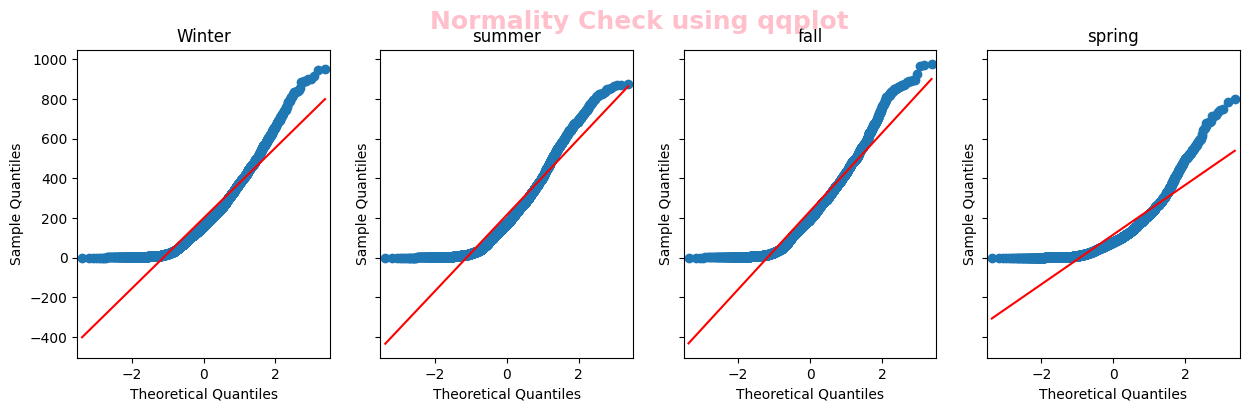

In [45]:
fig,ax = plt.subplots(1,4,figsize=(15,4), sharey=True)
fig.suptitle("Normality Check using qqplot",fontsize=18,weight='heavy',color='pink')
qqplot(winter,line='s',ax=ax[0])
ax[0].set_title('Winter')
qqplot(summer,line='s',ax=ax[1])
ax[1].set_title('summer')
qqplot(fall,line='s',ax=ax[2])
ax[2].set_title('fall')
qqplot(spring,line='s',ax=ax[3])
ax[3].set_title('spring')
plt.show()

In [46]:
# checking variance using levene test
# Ho: The variance are equal
# Ha: The variance are different

_, p_value = stats.levene(winter,summer,fall,spring)
if p_value < 0.05:
    print(f"The p_value is {p_value}")
    print("Reject the null hypothesis")
    print("The variance are different")
else:
    print(f"The p_value is {p_value}")
    print("Failed to reject the null hypothesis")
    print("The variance are same")

The p_value is 1.1170990373788981e-118
Reject the null hypothesis
The variance are different


In [47]:
# kruskal test
stat, p = stats.kruskal(winter,summer,fall,spring)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
 print('The number of cycles rented are similar in different season')
else:
 print('The number of cycles rented are different in different season')

stat=699.882, p=0.000
The number of cycles rented are different in different season


In [48]:
# using Anova f_oneway to test the hypothesis
statistic,p_value = stats.f_oneway(winter,summer,fall,spring)
if p_value < 0.05:
    print(f"p_value : {p_value}\nstatistic value: {statistic}")
    print("Reject the null hypothesis")
    print("The number of cycles rented are different in different season")
else:
    print(f"p_value : {p_value}\nstatistic value: {statistic}")
    print("Failed to Reject the null hypothesis")
    print("The number of cycles rented are similar in different season")

p_value : 6.204069471997093e-149
statistic value: 236.94289498936618
Reject the null hypothesis
The number of cycles rented are different in different season


# Chi-Squared test

### Ho: Weather is independent on season

####  Ha: Weather is dependent on season

In [49]:
# taking sample of 50 from both categorical values
season = df.sample(50,replace=True,random_state=2400).season
weather = df.sample(50,replace=True,random_state=2400).weather

In [50]:
# using chi2_contingency
statistic, p_value, _,_ = stats.chi2_contingency(pd.crosstab(season,weather))
if p_value < 0.05:
    print(f"p_value: {p_value}\nstatistic value: {statistic}")
    print("Reject the null hypothesis")
    print("Weather is dependent on season")
else:
    print(f"p_value: {p_value}\nstatistic value: {statistic}")
    print("Failed to Reject the null hypothesis")
    print("Weather is independent on season")

p_value: 0.8264052457515734
statistic value: 2.8583391398517444
Failed to Reject the null hypothesis
Weather is independent on season
